# Computational Code and Output

In [1]:
options(repr.plot.width=8, repr.plot.height=6)
library(broom)
library(latex2exp)
library(tidyverse)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ dials        1.2.0     ✔ rsample      1.2.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

## Introduction (Recap)

Our group aims to investigate how the response variable 'Overall Score' is affected by the various performance indicators collected in the Syed Ali Taqi's *World University Rankings 2023* dataset. My individual question seeks to ask *'How do the top two locations for university rankings affect the association between OverAll Score and its "Score" predictors?'*.

### Introduction to Data 

The dataset our group is working with is Syed Ali Taqi's *World University Rankings 2023*. This dataset describes a ranking of 1799 universities of the world ranked based on 13 performance indicators over 4 key areas. This dataset contains over 680,000 datapoint from more than 2,500 institutions that collect university data. 

The 13 variables listed in this dataset are: University Rank, University Name, Location, Number of Students, Number of Students per Staff, Number of International Students, Female:Male Ratio, Overall Score, Teaching Score, Research Score, Citations Score, Industry Income Score, and International Outlook Score. 

1. University Rank - (Ordinal Variable) Number value for each university. Universities ranked lower than 200 are grouped together. 
2. University Name - (String) String name of university.
3. Location - (String) String name of location of university.
4. Number of Students - (Number) Number value for number of students.
5. Number of Students per Staff - (Number) Numerical value rounded to the nearest 0.1 for the number of students per professor. 
6. Number of International Students - (Number) Number value for number of students not citizens in the country of the university. 
7. Female:Male Ratio (Ratio) - Ratio of number of female to the number of male students.
8. Overall Score (Number) - University's overall score out of 100.
9. Teaching Score (Number) - Qualitative teaching score out of 100.
10. Research Score (Number) - Qualitative research score out of 100.
11. Citation Score (Number) - Number of citations received by a journal in one year to documents published by the university in the previous 3 years (score out of 100).
12. Industry Income Score (Number) - How much money a university receives from industry for its academic expertise.
13. International Outlook Score (Number) - Score out of 100 of a university's ability to attract international students. 

The dataset was built using the Times Higher Education's World University Ranking 2023 (seen here: https://www.timeshighereducation.com/world-university-rankings/2023/world-ranking)

Source: https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023?resource=download

## Preliminary Data Analysis and Visualisation

In a preliminary analysis, I explored how Location and Research Score are associated with Overall Score in a multi-linear regression model with interaction terms. The selection of "Research Score" was arbitrary and further investigations will use a standard method on selecting our explanatory variable. Likewise, the categorical variable Location was further filtered to only investigate the top two locations in overall rankings (this selection will be more rigorously proved in the following **Methods and Plans** section). With these variables, I was able to construct a multi-linear regression model with interactions (see Figure 1 below).

In [2]:
data <- read_csv("https://raw.githubusercontent.com/owenkwong/STAT301-GROUP27/main/Ranking.csv") 

colnames(data) <- gsub(" ", "_", colnames(data))
colnames(data) <- gsub(":", "_", colnames(data))
data$International_Student <- gsub("%", "", data$International_Student)

wrangled_data <- data |>
    mutate(OverAll_Score = as.numeric(OverAll_Score)) |>
    mutate(Teaching_Score = as.numeric(Teaching_Score)) |>
    mutate(Research_Score = as.numeric(Research_Score)) |>
    mutate(Citations_Score = as.numeric(Citations_Score)) |>
    mutate(Industry_Income_Score = as.numeric(Industry_Income_Score)) |>
    mutate(International_Outlook_Score = as.numeric(International_Outlook_Score)) |>
    mutate(International_Student = round(as.numeric(International_Student) * No_of_student * 0.01)) |>
    filter(!is.na(OverAll_Score)) |>
    filter(!is.na(Teaching_Score)) |>
    filter(!is.na(Research_Score)) |>
    filter(!is.na(Citations_Score)) |>
    filter(!is.na(Industry_Income_Score)) |>
    filter(!is.na(International_Outlook_Score))

head(wrangled_data)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `OverAll_Score = as.numeric(OverAll_Score)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Teaching_Score = as.numeric(Teaching_Score)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Research_Score = as.numeric(Research_Score)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Citations_Score = as.numeric(

University_Rank,Name_of_University,Location,No_of_student,No_of_student_per_staff,International_Student,Female_Male_Ratio,OverAll_Score,Teaching_Score,Research_Score,Citations_Score,Industry_Income_Score,International_Outlook_Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,University of Oxford,United Kingdom,20965,10.6,8805,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,5472,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,7872,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,3879,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,3767,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,761,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


In [3]:
selected_data <- wrangled_data |>
    filter(Location == "United Kingdom" | Location == "United States") |>
    select(Location, OverAll_Score,Research_Score)

MLR_int <- lm(OverAll_Score ~ Location * Research_Score, selected_data)
MLR_int


Call:
lm(formula = OverAll_Score ~ Location * Research_Score, data = selected_data)

Coefficients:
                         (Intercept)                 LocationUnited States  
                            32.34379                              -0.54002  
                      Research_Score  LocationUnited States:Research_Score  
                             0.62641                              -0.01349  


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


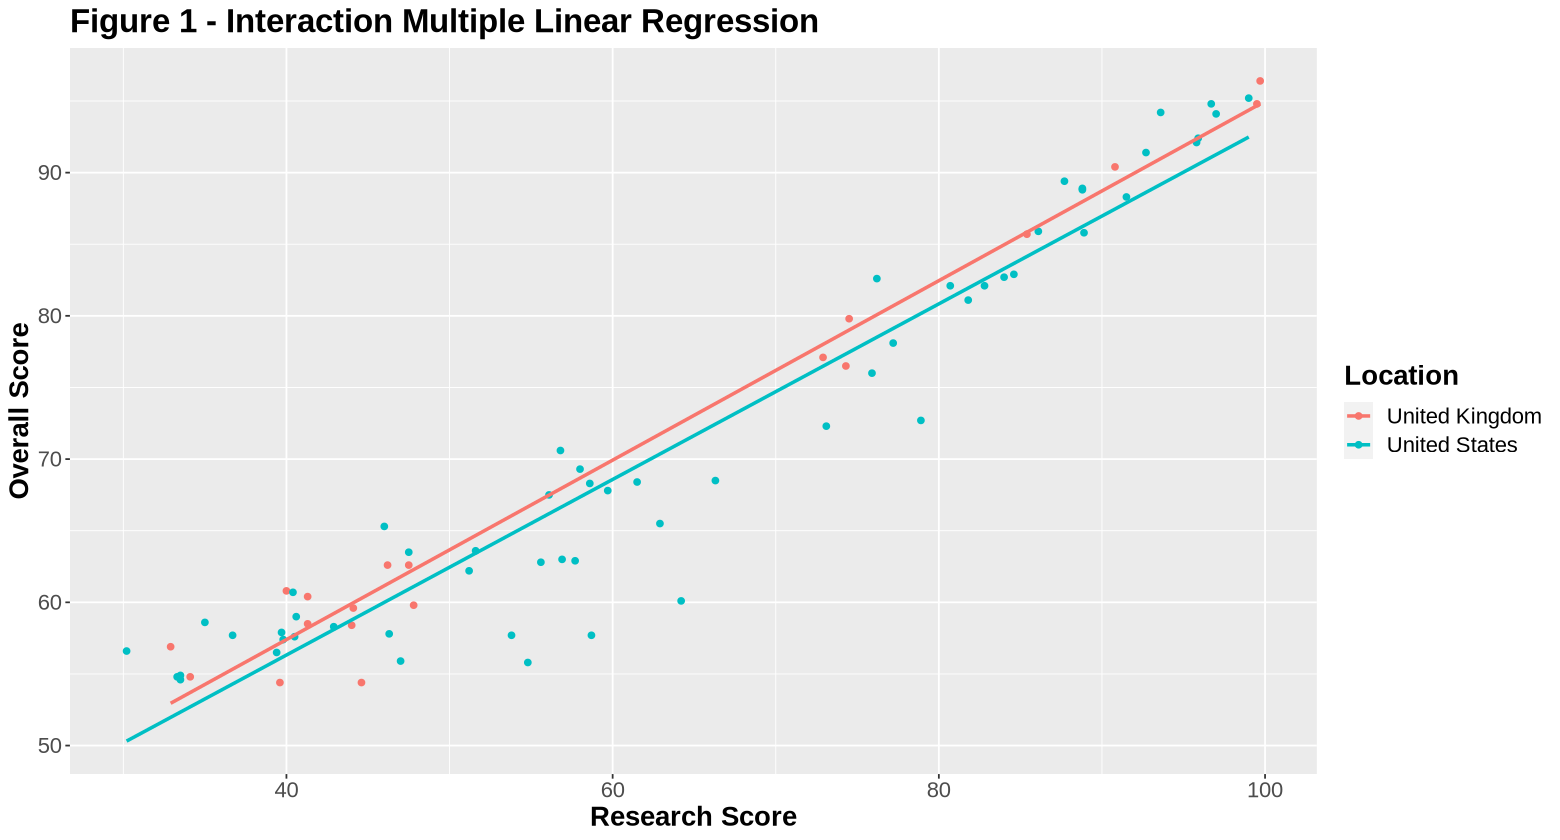

In [4]:
options(repr.plot.width = 13, repr.plot.height = 7)
selected_data$pred_MLR_int <- predict(MLR_int)

MLR_int_plot <- ggplot(selected_data, aes(
  x = Research_Score,
  y = OverAll_Score,
  color = Location
)) +
  geom_point() +
  geom_line(aes(y = pred_MLR_int), size = 1) +
  labs(
    title = "Figure 1 - Interaction Multiple Linear Regression",
    x = "Research Score",
    y = "Overall Score"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "Location")
MLR_int_plot

## Plan

The plan for this assignment will be to first identify which variables we want to investigate, then model the relationship between the response variable (OverAll), Location, and the selected variables. This investigation will add to the Final Report our group aims to write and answer the question: *"What variables are most closely associated with a university's overall score?"*.

## Methodology

The first step in our investigation involves selecting the explanatory variables to be used for analysis:

**Location**

I decided on selecting the top 5 Locations to be used in our analyses. This will allow for a reduced MLR model, while also focusing on the highest performing, and most relevant, locations using our response variable OverAll Score.

To obtain these 5 locations, we can calculate the average OverAll Score for all locations (excluding N/A fields) using the group_by() and summarise() functions in the dplyr package. With our categorical variable selected, we can now select our second explanatory variable to be used for investigation.

**Variable Selection**

While my individual question does not directly address our group’s overall question, this individual project must nevertheless address which variable is most closely associated with overall score. Therefore, while variable selection and the answer to our group’s question will be covered in more depth by another group member, this project must also devise a plan on selecting the most closely associated explanatory variable.

Identifying which indicators are most closely associated with OverAll Score may be difficult as several challenges will arise. The first is multicollinearity, when input variables are highly correlated. Upon visual inspection, Taqi’s dataset seems particularly vulnerable to multicollinearity, especially regarding the 6 ‘score’ variables (including overall score). Therefore, before any variable selection can be performed, we must first eliminate input variables with high multicollinearity. We first identify variables with the highest Variance Inflation Factor (VIF) and eliminate the top-2 variables. This will help in reducing the risk of multicollinearity as we continue in variable selection.

For variable selection, it is better to use a forward selection technique. Since we are only seeking to identify the top 1 variable which is most closely associated with overall score. It is more efficient to use forward selection.

**MLR Model**

Once we have identified the 5 locations with highest average overall scores, and the top-1 most closely associated variable with overall score, we can then begin to construct a multi-linear regression model. We can use lm to fit a regression model between overall score, our variable previously selected, and the categorical variable location (with 5 levels). We use interactions between explanatory variables as we want to determine whether the relationship with our selected variable and overall score is dependent on location. 
For this test, our null hypothesis is “The relationship between our chosen variable and overall score is the same regardless of location”. Finally we can find the estimated coefficients and their corresponding p-values in order to test our hypothesis at a 10% significance level.

### Changes to Proposed Model

The first change I made was to the selection of the categorical variable Location. While selecting the top Locations by overall score seems appealing, it leads to including some locations with only 1 university (i.e. Singapore). This will cause our MLR model to have difficulties in estimating an accurate coefficient. Therefore, I decided to select the top locations by number of universities, which will allow for more data points to be used in creating a more accurate MLR model.

The second change I made was to the number of levels to include for our categorical variable Location. 5 variables caused too much interactions between terms when building a multiple linear regression model with interaction. Therefore, I reduced the number of levels to 3 (i.e. selecting the top 3 locations by number of universities).

## Implementation of proposed model

In [5]:
### Selection of Location

location_data <- wrangled_data |>
    group_by(Location) |>
    summarise(mean = mean(OverAll_Score),
             sum = sum(No_of_student),
             num = n()) |>
    filter(!is.na(Location))

location_ordered_by_num <- location_data |>
    arrange(-num)

locations <- top_n(location_ordered_by_num, 3, num)$Location
locations

[1] "United States"  "Germany"        "United Kingdom"

In [6]:
### Eliminating top-2 highest VIF variables
score_data <- wrangled_data |>
    select(Teaching_Score, Research_Score, Citations_Score, Industry_Income_Score, International_Outlook_Score, OverAll_Score)

MLR_score <- lm(OverAll_Score ~., data = score_data)
vif_score_vars <- vif(MLR_score)
round(vif_score_vars, 3)

Teaching_Score              Research_Score 
                      6.551                       6.866 
            Citations_Score       Industry_Income_Score 
                      1.252                       1.316 
International_Outlook_Score 
                      1.339

In [7]:
## Using Forward Variable Selection to obtain explanatory variable

red_score_data <- score_data |> select(-Teaching_Score, -Research_Score)

score_fwd_sel <- regsubsets(
    OverAll_Score ~., red_score_data,
    nvmax = 3,
    method = "forward")

summary(score_fwd_sel)

Subset selection object
Call: regsubsets.formula(OverAll_Score ~ ., red_score_data, nvmax = 3, 
    method = "forward")
3 Variables  (and intercept)
                            Forced in Forced out
Citations_Score                 FALSE      FALSE
Industry_Income_Score           FALSE      FALSE
International_Outlook_Score     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: forward
         Citations_Score Industry_Income_Score International_Outlook_Score
1  ( 1 ) "*"             " "                   " "                        
2  ( 1 ) "*"             "*"                   " "                        
3  ( 1 ) "*"             "*"                   "*"                        

In [8]:
##

red_data <- wrangled_data |>
    #filter(Location == "United States" | Location == "United Kingdom")
    filter(Location %in% locations)
red_MLR <- lm(OverAll_Score ~ Location * Citations_Score, data = red_data)

red_MLR


Call:
lm(formula = OverAll_Score ~ Location * Citations_Score, data = red_data)

Coefficients:
                           (Intercept)                  LocationUnited Kingdom  
                               46.9875                                -70.5013  
                 LocationUnited States                         Citations_Score  
                              -54.3195                                  0.1647  
LocationUnited Kingdom:Citations_Score   LocationUnited States:Citations_Score  
                                0.8367                                  0.7074  


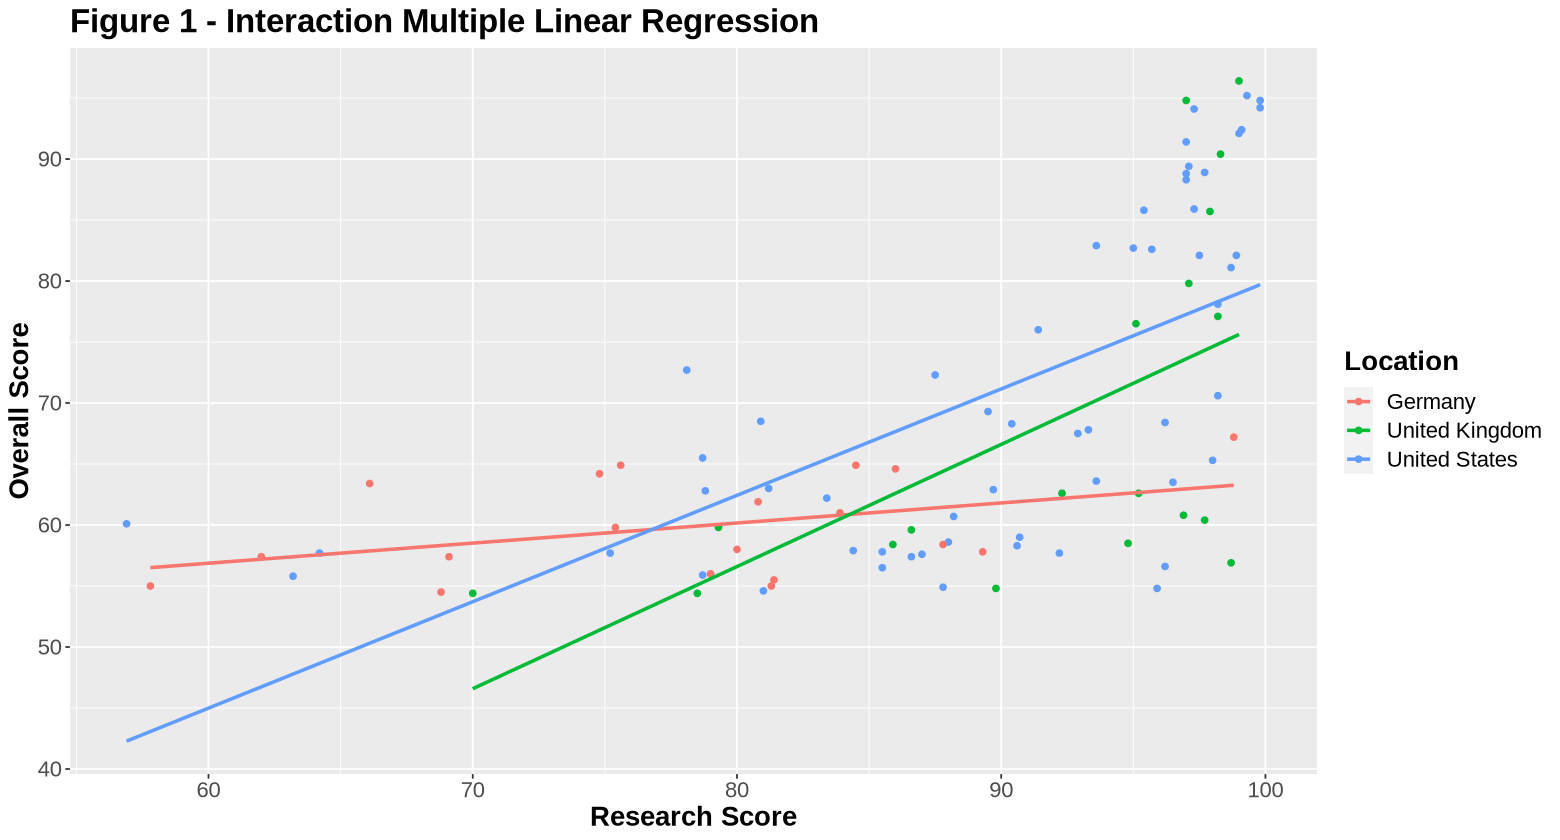

In [9]:
red_data$red_MLR_int <- predict(red_MLR)

red_MLR_int_plot <- ggplot(red_data, aes(
  x = Citations_Score,
  y = OverAll_Score,
  color = Location
)) +
  geom_point() +
  geom_line(aes(y = red_MLR_int), size = 1) +
  labs(
    title = "Figure 1 - Interaction Multiple Linear Regression",
    x = "Research Score",
    y = "Overall Score"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  labs(color = "Location")

red_MLR_int_plot

In [12]:
score_MLR_int_results <- tidy(red_MLR, conf.int = TRUE, conf.level = 0.90) %>% mutate_if(is.numeric, round, 2)
score_MLR_int_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),46.99,18.58,2.53,0.01,16.10,77.88
LocationUnited Kingdom,-70.50,32.35,-2.18,0.03,-124.27,-16.74
LocationUnited States,-54.32,22.54,-2.41,0.02,-91.78,-16.85
Citations_Score,0.16,0.24,0.70,0.49,-0.23,0.56
LocationUnited Kingdom:Citations_Score,0.84,0.37,2.25,0.03,0.22,1.45
LocationUnited States:Citations_Score,0.71,0.28,2.57,0.01,0.25,1.16


In [13]:
## Obtaining p-value for Location:Citations_Score
score_p_value <- score_MLR_int_results |>
    filter(grepl('Citations_Score', term))

score_p_value$p.value

[1] 0.49 0.03 0.01

**Observation:** Since at least one p-value is less than 0.1, reject null hypothesis.

## Conclusion

At a 10% significance level, there is sufficient evidence to reject the null hypothesis that the change in Citations_Score per unit change in OverAll_Score is the same regardless of Location. Therefore, we can conclude at a 10% significance level that Location affects the relationship between Citations Score and OverAll Score. One potential problem with the result given, is that by visually inspecting the figure, there exists a possible heteroscedastic relationship between Citations_Score and Overall_Score. To diagnose this issue, a plot of the residuals should show a clear funnel shape if it is heteroscedastic, and in order to correct this issue, we can transform Citations_Score by taking its natural logarithms. 

**Dominic Leo (66545906)**